# Data Cleaning Practices

In this lab, we will apply learned concepts from Day 1-2 lectures to perform data cleaning on a given Airbnb data set. 

This dataset (raw.csv) contains 30k+ records on hotels in the top-10 tourist destinations and major US metropolitan areas sraped from Airbnb.com. 
Each data record has 40 attributes including the number of bedrooms, price, location, etc. 
The attribute "pop2016" means population of the zipcode location (area) in year 2016.
Demographic and economic attributes were scraped from city-data.com. 

Our goal is to predict **Rating of house**.


The three dimensions of attributes are described as below:

## House specific features, collected from Airbnb.com:
1. Bathrooms: The number of bathrooms in the listing
1. Bedrooms: The number of bedrooms
1. Beds: The number of bed(s)
1. LocationName: Location of the house
1. NumGuests: Maximum number of guests can hold
1. NumReviews: number of reviews received
1. Price: daily price in local currency
1. **Rating: Y/N - whether the rating of each house is 5 or not**
1. latitude: location information latitude
1. longitude: location information longitude
1. zipcode: zipcode of the house

## Demographic and economic attributes based on zipcode, collected from city-data.com (means the same zipcode should share the same value for each of the following attributes)
1. pop2016: popularity of the area reported in 2016
1. pop2010: popularity of the area reported in 2010
1. pop2000: popularity of the area reported in 2000
1. cost_living_index: a U.S standarded index for cost living measurement
1. land_area: space of land
1. water_area: space of water area
1. pop_density: density of population 
1. number of males: within the area population
1. number of females: within the area population
1. prop taxes paid 2016: Median real estate property taxes paid for housing units in 2016
1. median taxes: median of taxes paid by house owners in the area
1. median house value: median of house value in the area
1. median household income: median of income of house owners in the area
1. median monthly onwer costs (with mortgage): median monthly cost of house owner including mortgage
1. median monthly onwer costs (no mortgage): median monthly cost of house owner without considering mortgage
1. median gross rent: the monthly rent agreed or contracted for plus the estimated monthly cost of utilities and fuels.
1. median asking price for vacant for-sale home/condo: median asking price for for-sale home in the area
1. unemployment: umemployment ratio of the area

## Aggregated features for Abnb by zipcode 
1. Number of Homes	Count of Abnb:	number of Abnb houses in this area
1. Density of Abnb (%): ratio of Abnb houses in this area
1. Average Abnb Price (by zipcode): aggregated by zipcode
1. Average NumReviews (by zipcode): aggregated by zipcode	
1. Average Rating (by zipcode): aggregated by zipcode
1. Average Number of Bathrooms (by zipcode): aggregated by zipcode
1. Average Number of Bedrooms (by zipcode): aggregated by zipcode
1. Average Number of Beds (by zipcode): aggregated by zipcode
1. Average Number of Guests (by zipcode): aggregated by zipcode

### Let's import needed libraries

In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

import geopandas as gpd
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="http")

# allow display of multiple outputs by running one code cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Data Exploration and Cleaning
Task 1: Read dataset and perform basic data exploration. 

In [ ]:
# check the data type and scale of each attribute.
df = pd.read_csv("datasets/lab1/raw.csv")

df.head(5)
df.info()
df.describe()

,Bathrooms,Bedrooms,Beds,LocationName,NumGuests,NumReviews,Price,Rating,latitude,longitude,...,Number of Homes,Count of Abnb,Density of Abnb (%),Average Abnb Price (by zipcode),Average NumReviews (by zipcode),Average Rating (by zipcode),Average Number of Bathrooms (by zipcode),Average Number of Bedrooms (by zipcode),Average Number of Beds (by zipcode),Average Number of Guests (by zipcode)
0,1.0,1.0,1.0,Atlanta,2.0,7.0,38.0,Y,33.75515,-84.32992,...,5306.0,75,1.413494,104.743243,35.280702,4.944444,1.459459,1.845070,2.146667,2.146667
1,1.0,1.0,1.0,Atlanta,2.0,15.0,38.0,N,33.82613,-84.33963,...,10537.2,96,0.911058,103.673684,21.169231,4.847458,1.281250,1.473118,1.687500,1.687500
2,2.0,2.0,2.0,Atlanta,4.0,17.0,100.0,Y,33.75076,-84.37058,...,9114.4,200,2.194330,119.368687,40.400000,4.937500,1.375000,1.602094,1.925000,1.925000
3,1.0,1.0,1.0,Atlanta,2.0,304.0,78.0,Y,33.77059,-84.33538,...,7808.0,130,1.664959,119.914729,44.063158,4.892857,1.292308,1.603306,1.953846,1.953846
4,1.0,1.0,1.0,Atlanta,2.0,19.0,50.0,Y,33.79030,-84.40027,...,9343.6,190,2.033477,131.058511,28.444444,4.881679,1.326316,1.580838,1.968421,1.968421


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33145 entries, 0 to 33144
Data columns (total 40 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Bathrooms                                           32697 non-null  float64
 1   Bedrooms                                            29818 non-null  float64
 2   Beds                                                32831 non-null  float64
 3   LocationName                                        32826 non-null  object 
 4   NumGuests                                           32831 non-null  float64
 5   NumReviews                                          32829 non-null  float64
 6   Price                                               32507 non-null  float64
 7   Rating                                              33145 non-null  object 
 8   latitude                                            33145 non-null  float64


,Bathrooms,Bedrooms,Beds,NumGuests,NumReviews,Price,latitude,longitude,zipcode,pop2016,...,Number of Homes,Count of Abnb,Density of Abnb (%),Average Abnb Price (by zipcode),Average NumReviews (by zipcode),Average Rating (by zipcode),Average Number of Bathrooms (by zipcode),Average Number of Bedrooms (by zipcode),Average Number of Beds (by zipcode),Average Number of Guests (by zipcode)
count,32697.000000,29818.000000,32831.000000,32831.000000,32829.000000,32507.000000,33145.000000,33145.000000,33145.000000,33103.000000,...,33103.000000,33145.000000,33103.000000,33145.000000,33145.000000,33145.000000,33145.000000,33145.000000,33145.000000,33145.000000
mean,1.215891,1.474479,1.940148,3.528373,51.086296,117.885071,36.700842,-97.464214,57754.753990,34018.967163,...,13607.586865,739.072077,36.405024,126.129854,49.056798,4.819490,1.236122,1.500675,1.952938,1.952938
std,0.547114,0.839045,1.421961,2.260288,62.151818,97.025832,5.198376,21.231474,36716.353574,22522.663845,...,9009.065538,1167.458959,96.259056,38.451543,16.486948,0.069848,0.131183,0.226741,0.356269,0.356269
min,0.000000,1.000000,0.000000,1.000000,2.000000,10.000000,25.452690,-122.544590,2108.000000,69.000000,...,27.600000,1.000000,0.003440,16.000000,4.000000,4.250000,0.344828,0.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,2.000000,11.000000,63.000000,32.749120,-122.259300,19147.000000,15504.000000,...,6201.600000,114.000000,0.805234,102.277778,38.602771,4.781250,1.178295,1.376812,1.732456,1.732456
50%,1.000000,1.000000,1.000000,3.000000,28.000000,90.000000,37.796110,-90.079520,70118.000000,33392.000000,...,13356.800000,284.000000,2.234994,117.697403,46.406699,4.835329,1.223011,1.461605,1.902098,1.902098
75%,1.000000,2.000000,2.000000,4.000000,67.000000,139.000000,40.647290,-75.181480,94112.000000,45420.000000,...,18168.000000,703.000000,5.538630,145.340708,57.070000,4.869565,1.317597,1.600000,2.145043,2.145043
max,9.000000,10.000000,20.000000,16.000000,1099.000000,999.000000,47.742760,-70.983350,98177.000000,114602.000000,...,45840.800000,4143.000000,330.488194,347.000000,206.000000,5.000000,3.043478,3.333333,6.000000,6.000000


Findings: 

1. There are 33,145 records, 40 attributes, two of them are object type, i.e., Rating (binary) and LocationName (city). However, though zipcode is a int type, you should know that this is in fact a categorical attribute. Also, atitude and longitude might not be blindly treated as numeric attribute, i.e., they together define the location of the house.
1. We also observe there are missing values, for instance, ``bedrooms'' has 29,818/33,145 non-null values. 
1. Scales of attributes vary a lot. For instance, number of bathroom ranges from 0 to 9, where pop2016 ranges from 69 to 114,602.

Task 2: Data quality check, does duplicate entries exit in this table? Do they have consistent values? Briefely explain your methodology and your findings within this markdown cell, and write corresponding code in the next code cell.

Methodology: This data set does not provide a unique id for each listed house. Even they provided a id, we still do not know they refer to a listed item or a unique house. For instnace, one house may have multiple entries in Airbnb dataset. Then how can we identify potential duplicate listing house? We can check latitude and longitude values as they can define an address in a fine-grained level. See how can we transfer a pair of latitude and longitude to an address: https://www.latlong.net/Show-Latitude-Longitude.html. Thus, our methodology is to use <latitude, longitude> pair to find potential duplicate entries. 



In [ ]:
# Now, let's create a new feature named geoaddress, which is a string containing a pair of latitude and longitude values.
df['geoaddress'] = df['latitude'].astype(str)+', '+df['longitude'].astype(str)


# Next, we use the duplicated function of pandas to find duplicate records with the same geoaddress, sort_values would group entries with the same geoaddress, otherwise, they would be spread over the table. You can try without sorting.
df[df.duplicated(['geoaddress'], keep=False)].sort_values('geoaddress')

# Or you can use: df[df.duplicated(['latitude','longitude'], keep=False)].sort_values(["latitude", "longitude"]).
# More about how to use duplicated function: https://thispointer.com/pandas-find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns-using-dataframe-duplicated-in-python/

# Back to our quesiton, so we find that duplicate entries do exist, the next question is do they have consistent attribute values, i.e., for those having the same geoaddress are they having exact values for other attributes? 
# To help easy locate those inconsistent rows, we can add a new column specifying original row index for each record.

df['rawrowindex'] = np.arange(df.shape[0])


# Then we find those rows having duplicate geoaddress but no other rows having the exact values for all attributes.
havedupaddress = df[df.duplicated(['geoaddress'], keep=False)]['rawrowindex'].tolist()
haveduplicateall = df[df.duplicated(subset=df.columns.difference(['rawrowindex']), keep=False)]['rawrowindex'].tolist()
inconsistent = list(set(havedupaddress) - set(haveduplicateall))
inconsistentDF = df[df['rawrowindex'].isin(inconsistent)].sort_values('geoaddress')

# From the above process, we find 1552 rows having inconsistent attributes for the same house (same geoaddress). One potential explanation is that a record is crawled multiple times at different timestamp. 

# In this sample, for simplicity, i drop duplicate with the same geoaddress and just keep the last one appearing in the original input. However, more advanced techiniques can be applied. For instance, for consistent ones, keep any one as representative, for inconsistent ones, keep those have more reviews and less null values.
df = df.drop_duplicates(subset=['geoaddress'], keep='last')



,Bathrooms,Bedrooms,Beds,LocationName,NumGuests,NumReviews,Price,Rating,latitude,longitude,...,Density of Abnb (%),Average Abnb Price (by zipcode),Average NumReviews (by zipcode),Average Rating (by zipcode),Average Number of Bathrooms (by zipcode),Average Number of Bedrooms (by zipcode),Average Number of Beds (by zipcode),Average Number of Guests (by zipcode),geoaddress,rawrowindex


Task 3: Data quality check, write code and answer:
3.1 does missing value exit in the table? 
3.2 Where are the missing data? 
3.3 How much data is missing?
3.4 Are there any variables often missing together？

You can use missingno library to generate plots to support your claim. 
Summarize your findings for task 3 in this markdown cell and write corresponding code in the next code cell.

,Total missing,% missing
Bedrooms,2692,9.627696
median taxes (with mortgage,2443,8.737170
median taxes (no mortgage),2355,8.422446
median monthly owner costs (no mortgage),2320,8.297271
median monthly owner costs (with mortgage),2191,7.835914
median house value,2189,7.828761
Price,307,1.097958
Bathrooms,228,0.815421
median gross rent,163,0.582955
LocationName,134,0.479239


<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

,Bathrooms,Bedrooms,Beds,LocationName,NumGuests,NumReviews,Price,pop2016,pop2010,cost_living_index (US avg. = 100),...,median taxes (no mortgage),median house value,median houshold income,median monthly owner costs (with mortgage),median monthly owner costs (no mortgage),median gross rent,median asking price for vacant for-sale home/condo,unemployment (%),Number of Homes,Density of Abnb (%)
Bathrooms,1.000000,0.155109,0.750851,0.736541,0.750851,0.747923,0.482745,-0.003475,-0.003475,-0.003475,...,0.152925,0.149747,-0.004309,0.160019,0.154381,-0.006943,-0.005827,-0.005646,-0.003475,-0.003475
Bedrooms,0.155109,1.000000,0.208583,0.205584,0.208583,0.207611,0.129666,0.009673,0.009673,0.009673,...,0.060800,0.051568,0.004947,0.055520,0.062257,0.022786,-0.003925,-0.002732,0.009673,0.009673
Beds,0.750851,0.208583,1.000000,0.981078,1.000000,0.996129,0.646149,-0.002609,-0.002609,-0.002609,...,0.182684,0.190378,-0.003235,0.190280,0.184240,-0.005213,-0.004375,-0.004239,-0.002609,-0.002609
LocationName,0.736541,0.205584,0.981078,1.000000,0.981078,0.977278,0.633763,-0.002659,-0.002659,-0.002659,...,0.178474,0.186054,-0.003298,0.185958,0.180008,-0.005314,-0.004460,-0.004321,-0.002659,-0.002659
NumGuests,0.750851,0.208583,1.000000,0.981078,1.000000,0.996129,0.646149,-0.002609,-0.002609,-0.002609,...,0.182684,0.190378,-0.003235,0.190280,0.184240,-0.005213,-0.004375,-0.004239,-0.002609,-0.002609
NumReviews,0.747923,0.207611,0.996129,0.977278,0.996129,1.000000,0.643615,-0.002619,-0.002619,-0.002619,...,0.181824,0.189494,-0.003248,0.189397,0.183376,-0.005234,-0.004392,-0.004256,-0.002619,-0.002619
Price,0.482745,0.129666,0.646149,0.633763,0.646149,0.643615,1.000000,-0.004038,-0.004038,-0.004038,...,0.108925,0.111111,-0.005007,0.111036,0.107658,-0.008068,-0.006771,-0.006561,-0.004038,-0.004038
pop2016,-0.003475,0.009673,-0.002609,-0.002659,-0.002609,-0.002619,-0.004038,1.000000,1.000000,1.000000,...,0.126360,0.131488,0.806400,0.131423,0.127397,0.500434,0.596303,0.615401,1.000000,1.000000
pop2010,-0.003475,0.009673,-0.002609,-0.002659,-0.002609,-0.002619,-0.004038,1.000000,1.000000,1.000000,...,0.126360,0.131488,0.806400,0.131423,0.127397,0.500434,0.596303,0.615401,1.000000,1.000000
cost_living_index (US avg. = 100),-0.003475,0.009673,-0.002609,-0.002659,-0.002609,-0.002619,-0.004038,1.000000,1.000000,1.000000,...,0.126360,0.131488,0.806400,0.131423,0.127397,0.500434,0.596303,0.615401,1.000000,1.000000


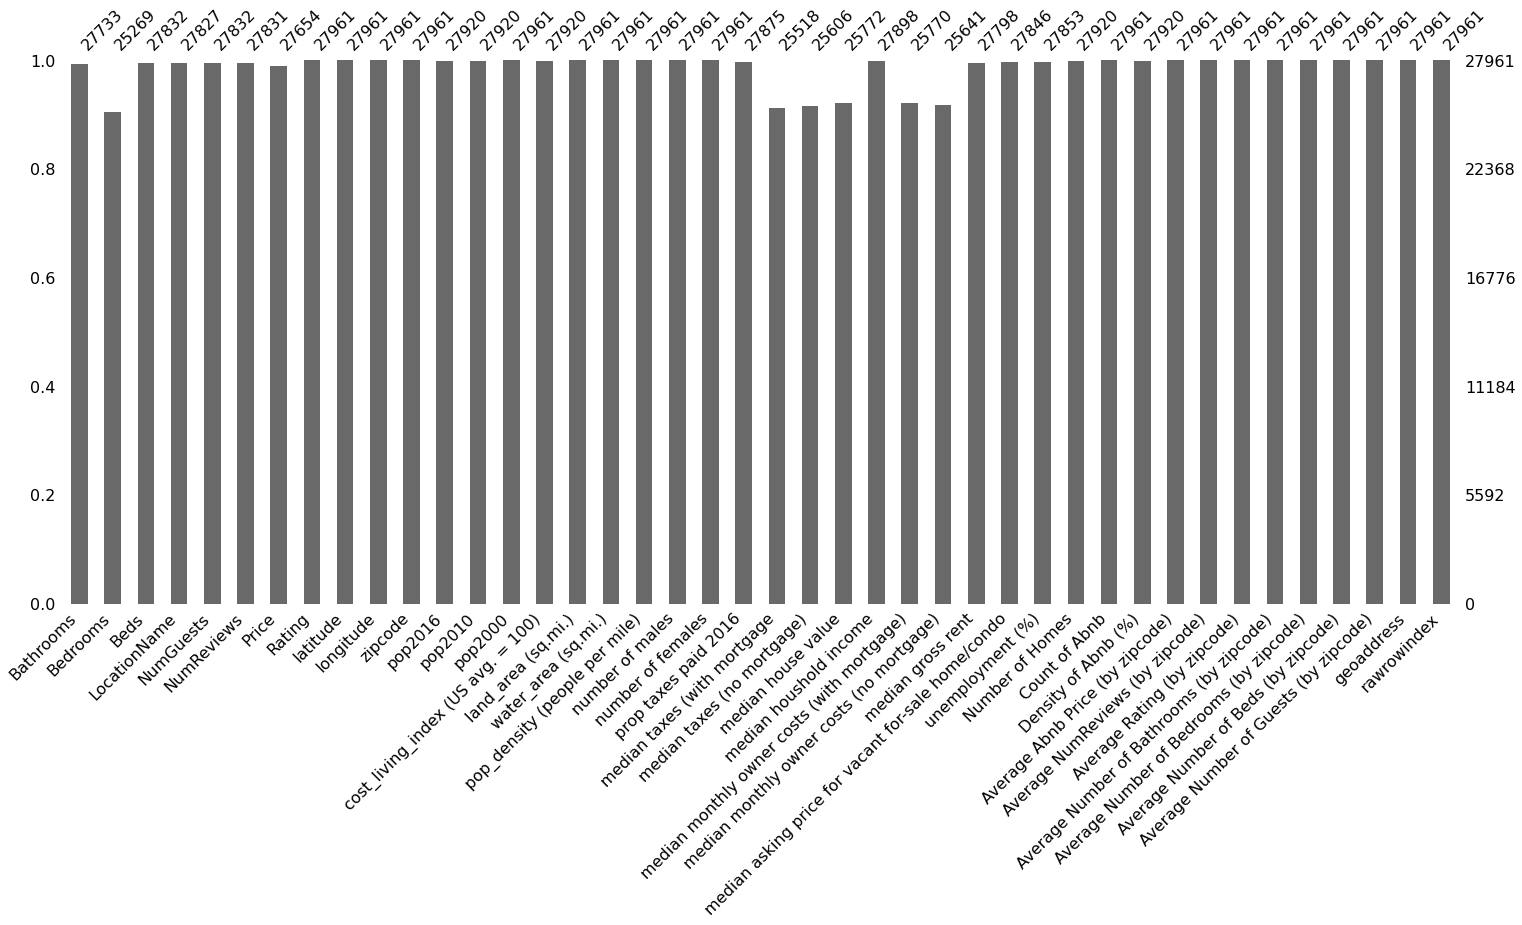

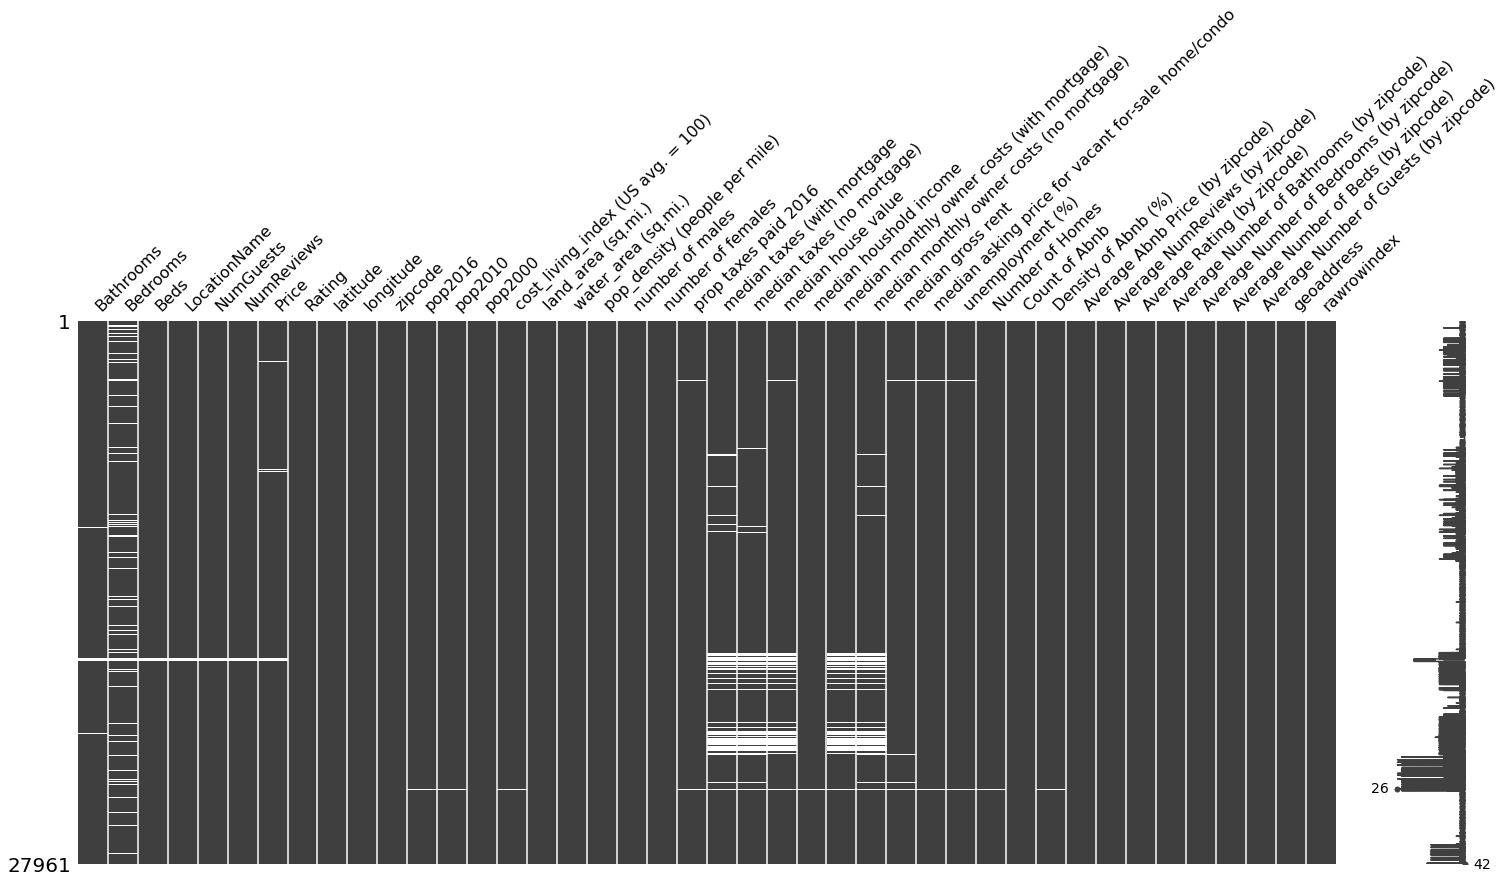

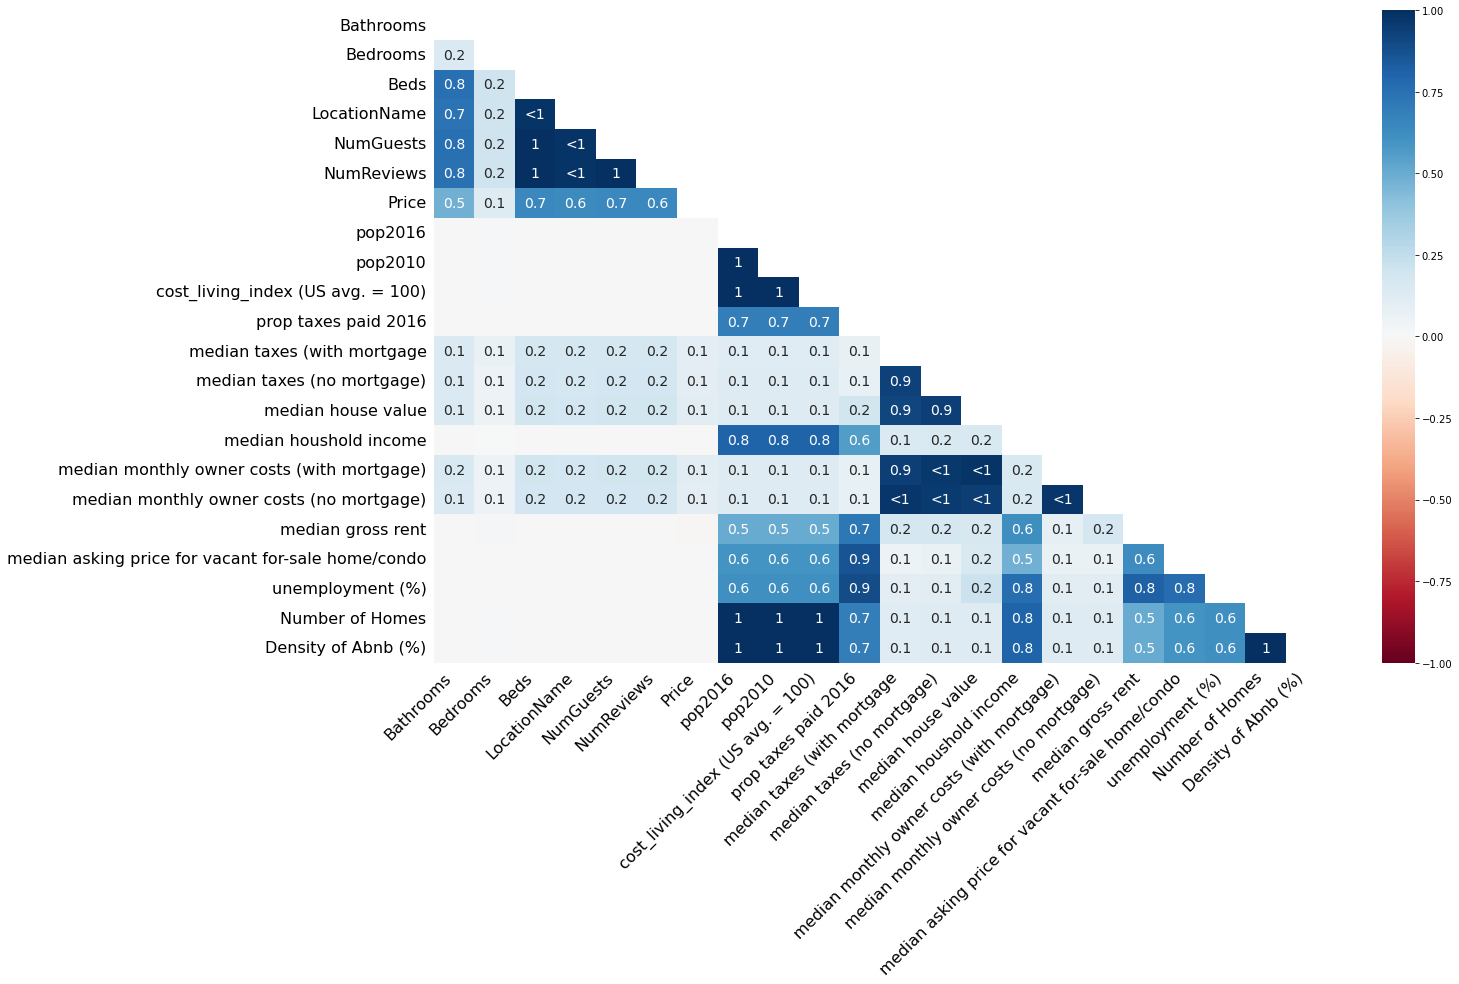

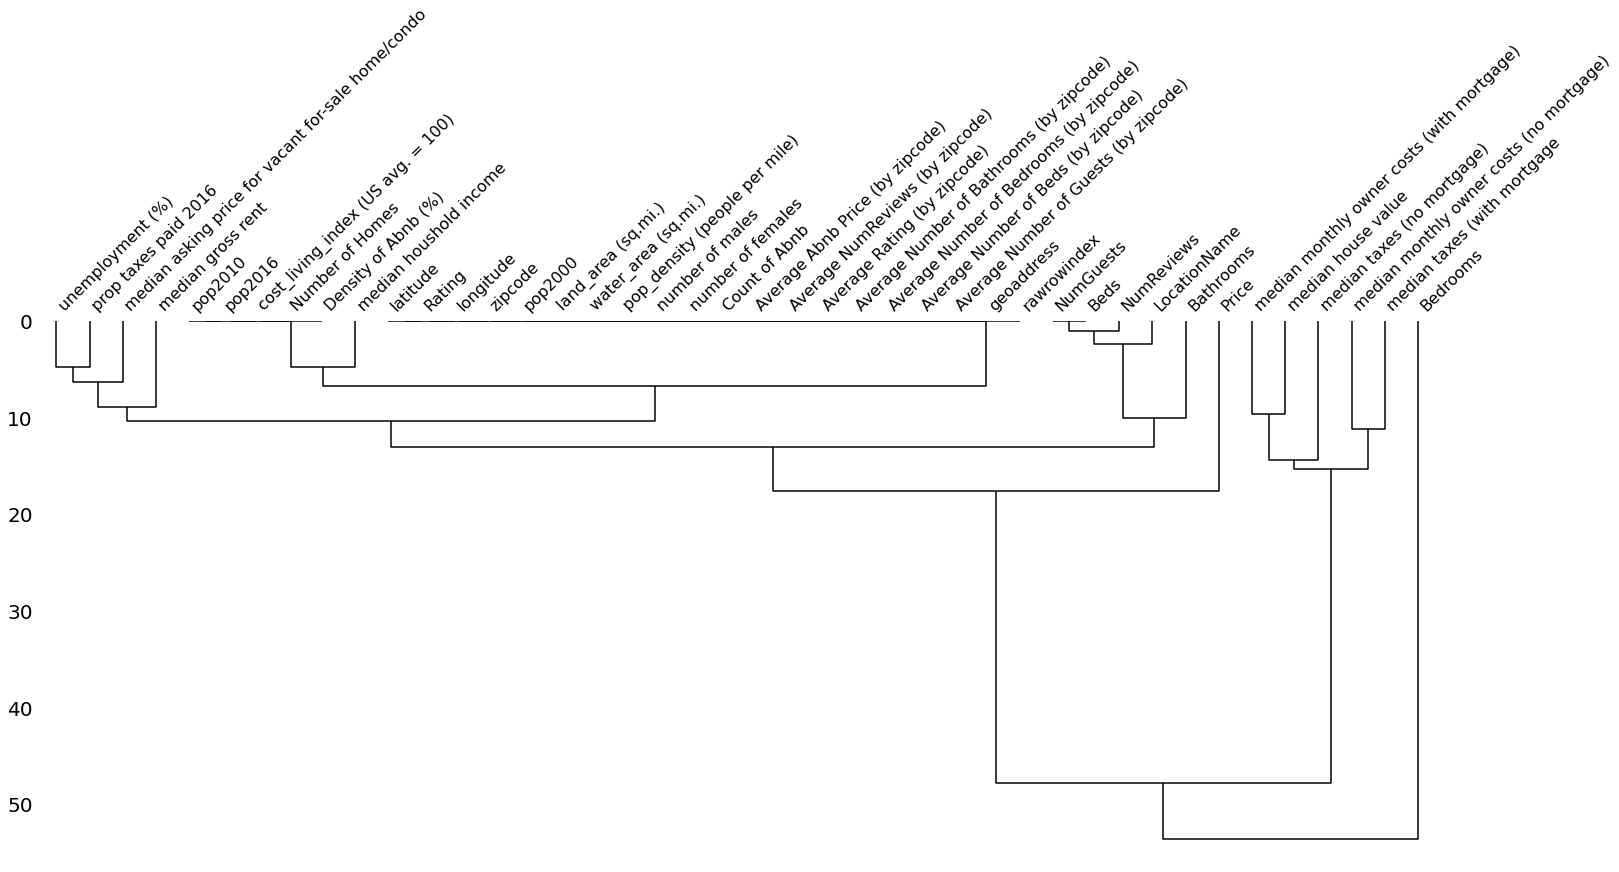

In [ ]:
# Task 3
# count the ratio of missing values
total_miss = df.isnull().sum()
percent_miss = (total_miss/df.isnull().count()*100)

# sort attributes by missing value ratio
missing_data = pd.DataFrame({'Total missing':total_miss,'% missing':percent_miss})
missing_data.sort_values(by='Total missing',ascending=False)

#analyzing missing data
#bar chart
msno.bar(df)

#visualize missing values as a matrix
msno.matrix(df)

#heapmap for correlation analysis
msno.heatmap(df)

#dendrogram plot
msno.dendrogram(df)

# The above correlation visualization is based on the following steps, you can consider them if you want to access to a matrix showing the missing value status of each attribute for each record.
df_ismissing = df.iloc[:, [i for i, n in enumerate(np.var(df.isnull(), axis='rows')) if n > 0]].isnull()
df_ismissing.corr()

#read more: https://github.com/ResidentMario/missingno

The above analysis shows that Bedrooms, median taxes (with mortgage), median taxes (no mortgage), median monthly owner costs (no mortgage), median monthly owner costs (with mortgage), median house value are the attributes having a lot of missing values(around 8-10%). We need to determine if we would like to directly exclude them from the model or keep them and perform imputation. Also among the above features, besides number of bedrooms, the other numbers have highly correlated missing status (i.e., whether they would miss and appear together). This shows that potentially those data are come from the same resource (e.g., survey), and thus unable to uncover a set of area (identified by zipcode).

Both dendrogram and heatmap show that there are two groups of features always missing values at same time (note, all attributes with complete data would have correlation value of 1 but it is not interesting to report):
1. pop2010, pop2016, cost_living_index, number of homes, density of Airbnb
1. numberguests and beds 

Task 4: What are the potential mechnisms of the missing values? Briefely explain your methodology and your findings (within this markdown cell), and write corresponding code in the next code cell.

Based on our analysis in task 3, it seems that some attribute values (taxes and house cost, value) are missing because they might based on survey or professional estimation and some Airbnb house do not have such information covered. 

Recall that there are three types of missing mechnisms, missing at complete random (MCAR), missing at random based on observed data (MAR), and missing at non-random (MNAR).

We could have a hypothesis that, the missing of economic attributes might be relevant to zipcode. If this is our hypothesis, how can we check it? Well, we can perform correlation analysis, i.e., checking what are the charateristics of zipcode that have missing pop2010, pop2016, cost_living_index, number of homes, density of Airbnb. Similar analysis can be performed on median taxes (with mortgage), median taxes (no mortgage), median monthly owner costs (no mortgage), median monthly owner costs (with mortgage), median house value.

(41, 2)

       zipcode            geoaddress
26972    98174  47.60388\t-122.33505
26975    98174  47.60263\t-122.33683
27109    98174   47.5994\t-122.33555
27125    98174  47.60344\t-122.33535
27238    98174  47.60144\t-122.33588
27329    98174  47.59889\t-122.33349
27381    98174  47.60803\t-122.34063
27382    98174   47.60733\t-122.3383
27388    98174  47.60774\t-122.33998
27406    98174  47.60607\t-122.33643
27541    98174  47.60794\t-122.33943
27571    98174  47.60809\t-122.34078
27597    98174  47.60235\t-122.33292
27601    98174  47.60443\t-122.33633
27626    98174  47.60392\t-122.33633
27631    98174  47.60266\t-122.33754
27639    98174  47.60148\t-122.33578
27673    98174   47.60403\t-122.3355
27702    98174  47.60295\t-122.33329
27736    98174   47.60733\t-122.3386
27774    98174    47.60157\t-122.333
27784    98174  47.60114\t-122.33436
27810    98174  47.59971\t-122.33557
27816    98174  47.60154\t-122.33325
27896    98174   47.5993\t-122.33404
27908    98174  47.60057\t-122.33431
2

,Bathrooms,Bedrooms,Beds,LocationName,NumGuests,NumReviews,Price,Rating,latitude,longitude,...,Density of Abnb (%),Average Abnb Price (by zipcode),Average NumReviews (by zipcode),Average Rating (by zipcode),Average Number of Bathrooms (by zipcode),Average Number of Bedrooms (by zipcode),Average Number of Beds (by zipcode),Average Number of Guests (by zipcode),geoaddress,rawrowindex


(129, 2)

       zipcode            geoaddress
19756    94130  37.73614\t-122.18279
19757    94130  37.73117\t-122.13902
19761    94130  37.81043\t-122.22396
19762    94130  37.77966\t-122.20922
19765    94130  37.78245\t-122.22468
...        ...                   ...
20058    94130  37.83708\t-122.26902
20059    94130   37.7985\t-122.25687
20061    94130  37.87388\t-122.26893
20066    94130  37.77031\t-122.26124
20067    94130   37.8401\t-122.26223

[129 rows x 2 columns]


,Bathrooms,Bedrooms,Beds,LocationName,NumGuests,NumReviews,Price,Rating,latitude,longitude,...,Density of Abnb (%),Average Abnb Price (by zipcode),Average NumReviews (by zipcode),Average Rating (by zipcode),Average Number of Bathrooms (by zipcode),Average Number of Bedrooms (by zipcode),Average Number of Beds (by zipcode),Average Number of Guests (by zipcode),geoaddress,rawrowindex
26972,1.0,2.0,2.0,Seattle,5.0,14.0,220.0,N,47.60388,-122.33505,...,NaN,150.162791,62.55814,4.785714,1.090909,1.351351,1.613636,1.613636,47.60388\t-122.33505,26972
26975,1.0,2.0,2.0,Seattle,5.0,52.0,220.0,N,47.60263,-122.33683,...,NaN,150.162791,62.55814,4.785714,1.090909,1.351351,1.613636,1.613636,47.60263\t-122.33683,26975
27109,1.0,NaN,1.0,Seattle,2.0,53.0,120.0,N,47.59940,-122.33555,...,NaN,150.162791,62.55814,4.785714,1.090909,1.351351,1.613636,1.613636,47.5994\t-122.33555,27109
27125,1.0,1.0,2.0,Seattle,4.0,76.0,118.0,Y,47.60344,-122.33535,...,NaN,150.162791,62.55814,4.785714,1.090909,1.351351,1.613636,1.613636,47.60344\t-122.33535,27125
27238,1.0,NaN,2.0,Seattle,2.0,18.0,200.0,Y,47.60144,-122.33588,...,NaN,150.162791,62.55814,4.785714,1.090909,1.351351,1.613636,1.613636,47.60144\t-122.33588,27238
27329,1.0,2.0,2.0,Seattle,4.0,103.0,204.0,Y,47.59889,-122.33349,...,NaN,150.162791,62.55814,4.785714,1.090909,1.351351,1.613636,1.613636,47.59889\t-122.33349,27329
27381,1.0,NaN,1.0,Seattle,2.0,219.0,111.0,Y,47.60803,-122.34063,...,NaN,150.162791,62.55814,4.785714,1.090909,1.351351,1.613636,1.613636,47.60803\t-122.34063,27381
27382,1.0,1.0,1.0,Seattle,4.0,10.0,130.0,Y,47.60733,-122.33830,...,NaN,150.162791,62.55814,4.785714,1.090909,1.351351,1.613636,1.613636,47.60733\t-122.3383,27382
27388,1.0,1.0,2.0,Seattle,4.0,16.0,85.0,N,47.60774,-122.33998,...,NaN,150.162791,62.55814,4.785714,1.090909,1.351351,1.613636,1.613636,47.60774\t-122.33998,27388
27406,1.0,1.0,1.0,Seattle,2.0,3.0,128.0,Y,47.60607,-122.33643,...,NaN,150.162791,62.55814,4.785714,1.090909,1.351351,1.613636,1.613636,47.60607\t-122.33643,27406


(2692, 2)

       zipcode           geoaddress
9        30306     33.76864\t-84.36
10       30308  33.77357\t-84.38437
13       30306  33.79078\t-84.33979
34       30306   33.7762\t-84.35903
36       30309   33.7838\t-84.39761
...        ...                  ...
33090    20319  38.87337\t-77.01798
33098    20003  38.87965\t-76.99003
33101    20003  38.87986\t-76.99554
33106    20005  38.91057\t-77.02866
33120    20003  38.88465\t-77.00106

[2692 rows x 2 columns]


array([[<AxesSubplot:title={'center':'zipcode'}>]], dtype=object)

94130    0.114042
33132    0.061293
92101    0.041233
98121    0.021545
92109    0.018945
           ...   
92139    0.000371
92128    0.000371
10463    0.000371
92067    0.000371
20319    0.000371
Name: zipcode, Length: 271, dtype: float64

94130    0.072458
33132    0.045993
94134    0.023819
92101    0.021029
33141    0.020564
           ...   
10474    0.000036
10464    0.000036
30336    0.000036
19142    0.000036
11364    0.000036
Name: zipcode, Length: 362, dtype: float64

(2443, 2)

       zipcode           geoaddress
371      30336  33.66957\t-84.60329
909       2163   42.35847\t-71.1114
924       2199  42.35162\t-71.08213
962       2199  42.34076\t-71.07954
1003      2199  42.34557\t-71.07762
...        ...                  ...
32916    20006  38.89824\t-77.04068
32926    20319  38.87641\t-77.01086
33082    20319  38.83812\t-77.05895
33090    20319  38.87337\t-77.01798
33135    20319  38.83974\t-77.05963

[2443 rows x 2 columns]


array([[<AxesSubplot:title={'center':'zipcode'}>]], dtype=object)

94130    0.829308
10037    0.029881
10026    0.026197
98164    0.022513
10005    0.019239
10162    0.018420
98174    0.016783
2199     0.012280
20319    0.009005
94104    0.006959
20006    0.003275
2163     0.002865
10282    0.002047
94129    0.000819
30336    0.000409
Name: zipcode, dtype: float64

,Bathrooms,Bedrooms,Beds,LocationName,NumGuests,NumReviews,Price,Rating,latitude,longitude,...,Density of Abnb (%),Average Abnb Price (by zipcode),Average NumReviews (by zipcode),Average Rating (by zipcode),Average Number of Bathrooms (by zipcode),Average Number of Bedrooms (by zipcode),Average Number of Beds (by zipcode),Average Number of Guests (by zipcode),geoaddress,rawrowindex
18848,2.0,3.0,3.0,Oakland,6.0,43.0,169.0,N,37.82374,-122.27303,...,330.488194,117.697403,43.552975,4.837386,1.189232,1.461605,1.775992,1.775992,37.82374\t-122.27303,18848
18849,1.0,1.0,1.0,Oakland,2.0,58.0,79.0,Y,37.80147,-122.27508,...,330.488194,117.697403,43.552975,4.837386,1.189232,1.461605,1.775992,1.775992,37.80147\t-122.27508,18849
18850,1.0,1.0,1.0,Oakland,2.0,80.0,70.0,Y,37.80222,-122.20541,...,330.488194,117.697403,43.552975,4.837386,1.189232,1.461605,1.775992,1.775992,37.80222\t-122.20541,18850
18851,2.0,3.0,5.0,Berkeley,6.0,8.0,350.0,Y,37.86787,-122.27824,...,330.488194,117.697403,43.552975,4.837386,1.189232,1.461605,1.775992,1.775992,37.86787\t-122.27824,18851
18852,1.0,1.0,1.0,"Rockridge, Oakland",2.0,32.0,93.0,Y,37.83795,-122.25938,...,330.488194,117.697403,43.552975,4.837386,1.189232,1.461605,1.775992,1.775992,37.83795\t-122.25938,18852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26840,1.0,NaN,1.0,Oakland,2.0,27.0,109.0,N,37.83773,-122.28135,...,330.488194,117.697403,43.552975,4.837386,1.189232,1.461605,1.775992,1.775992,37.83773\t-122.28135,26840
26845,1.0,1.0,1.0,Oakland,3.0,14.0,70.0,N,37.82650,-122.27467,...,330.488194,117.697403,43.552975,4.837386,1.189232,1.461605,1.775992,1.775992,37.8265\t-122.27467,26845
26848,1.0,1.0,1.0,Oakland,1.0,9.0,72.0,Y,37.83538,-122.19974,...,330.488194,117.697403,43.552975,4.837386,1.189232,1.461605,1.775992,1.775992,37.83538\t-122.19974,26848
26849,1.0,3.0,3.0,Oakland,6.0,11.0,110.0,N,37.83545,-122.26320,...,330.488194,117.697403,43.552975,4.837386,1.189232,1.461605,1.775992,1.775992,37.83545\t-122.2632,26849


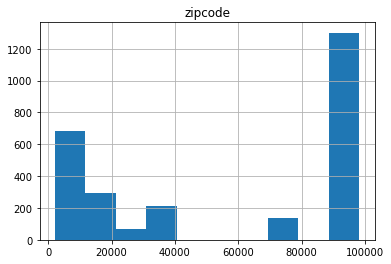

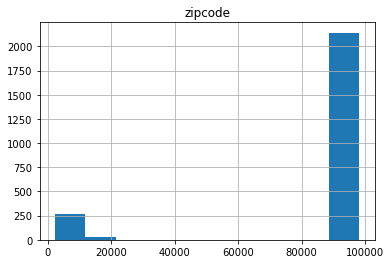

In [ ]:
# Task 4
# Let's first retrieve the records with missing pop2016.
recordsmissingpop2016 = df[df['pop2016'].isnull()][["zipcode", "geoaddress"]]
recordsmissingpop2016.shape
print(recordsmissingpop2016)

# the above analysis shows that all missing values are from one zipcode, i.e., 98714. 

# now let's check if all zipcode = 98174 are all missing pop2016 attribute values
df.loc[(df['zipcode'] == 98174) & df['pop2016'].notnull()]

# the above analysis shows yes, we miss all pop2010, pop2016, cost_living_index, number of homes values for this zipcode. Thus the missing of those values are MAR.

# what about numberguests and beds ?
recordsmissingbeds = df[df['Beds'].isnull()][["zipcode", "geoaddress"]]
recordsmissingbeds.shape
print(recordsmissingbeds)

# similarily, we observe majority (not all!) of the missing values from zipcode = 94130
# now let's check if all zipcode = 94130 are all missing Beds attribute values
df.loc[(df['zipcode'] == 98174) & df['Beds'].notnull()]

# seems the case is different, we still have some houses in this zipcode reported Beds and numberguests. But still, we can say that missing of those values are MAR, because zip=94130 are more likely to miss this value than other areas. 

# How about Bedrooms? 
recordsmissingbedroom = df[df['Bedrooms'].isnull()][["zipcode", "geoaddress"]]
recordsmissingbedroom.shape
print(recordsmissingbedroom)

# seems there are still some zipcode more likely to miss bedrooms number, let's check frequency of zipcode and compare it with the one from all data
recordsmissingbedroom.hist(column='zipcode')
recordsmissingbedroom['zipcode'].value_counts(normalize=True)
df['zipcode'].value_counts(normalize=True)

# the above analysis show that zipcode = 94130 indeed still has a lot of missing values in attribute bedrooms, but this may because this area has a lot of airbnb listings. Comparing the ratio of records by zipcode, we can say the missing value of bedrooms might be slightly MAR or MCAR.

# what about median taxes (with mortgage), median taxes (no mortgage), median monthly owner costs (no mortgage), median monthly owner costs (with mortgage), median house value?
recordsmissingtax = df[df['median taxes (with mortgage'].isnull()][["zipcode", "geoaddress"]]
recordsmissingtax.shape
print(recordsmissingtax)
recordsmissingtax.hist(column='zipcode')
recordsmissingtax['zipcode'].value_counts(normalize=True) 
df.loc[(df['zipcode'] == 94130) ]


Task 5: Handling missing values, Briefely explain your methodology below (within this markdown cell), and write corresponding code in the next code cell.

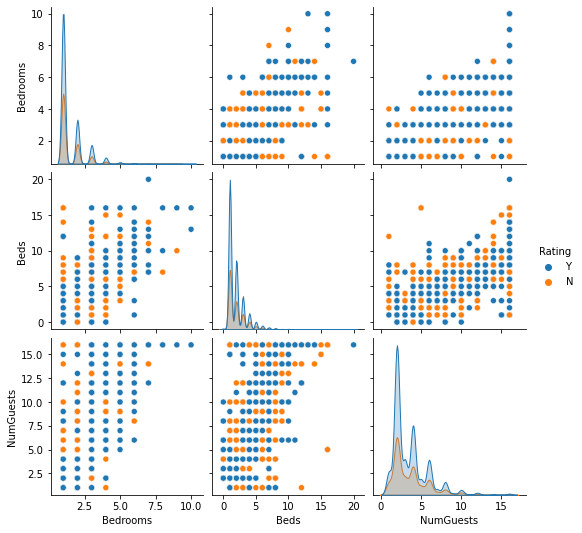

In [ ]:
# Task 5
# First, let's decide what to do with the Bedrooms feature, this feature missing nearly 10% of the values. Our first impression is that this feature might overlap with beds and number of guests. Let's take a look at their correlation.
selectedDF = df[["Bedrooms", "Beds", "NumGuests", "Rating"]] 
sns.pairplot(selectedDF, hue='Rating')  

plt.show()

# seems they are positively correlated, but we do not see stong pattern between Rating (class label) and each of the above features. This mean that rating might not be that relevant to number of bedrooms.
# However, we should not ignore this feature, because it is possible that rating prediction for different beds house should be better modeled locally.


Now let's compute correlation matrix. 

There are several statistics that you can use to quantify correlation. For instance
1. Pearson’s r
1. Spearman’s rho
1. Kendall’s tau

Pearson’s coefficient measures linear correlation, while the Spearman and Kendall coefficients compare the ranks of data. There are several NumPy, SciPy, and Pandas correlation functions and methods that you can use to calculate these coefficients. You can also use Matplotlib to conveniently illustrate the results.


,Bedrooms,Beds,NumGuests
Bedrooms,1.00,0.76,0.81
Beds,0.76,1.00,0.85
NumGuests,0.81,0.85,1.00


<AxesSubplot:>

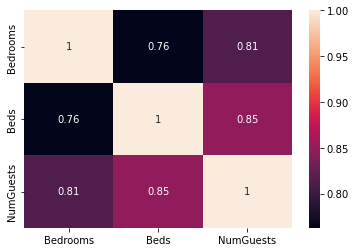

In [ ]:
cormat = selectedDF.corr(method = 'pearson') # The method of correlation
round(cormat,2)
sns.heatmap(cormat,annot=True)

The above analysis shows that there is a strong correlation between value of bedrooms and numGuests (>0.8). **Thus, we can just ignore Bedroom column.**

How about those missing demographic and economic attributes? Based on our analysis, all pop2010, pop2016, cost_living_index, number of homes values for zipcode = 98174 is missing. 

Let's check if it is reasonable to remove all records having this zipcode.

In [ ]:
# check all records having 98174 as the zipcode and see if missing values is freuqent in those records.
df.loc[(df['zipcode'] == 98174)].isnull().sum(axis=1)

# the above result shows that missing values frequently appear in those entries, that might also be the reason we see some rows having white lines in missing value visualization matrix plot. Thus we can remove those records (41 records). 
df = df[~(df['zipcode'] == 98174)]


#For the rest missing values, we can replace them using the mean of value within the same zipcode. If zipcode based mean does not exist, we replace them with feature-wise mean.
# Iterate over the sequence of column names
columnwithMissing = df.columns[df.isnull().any()]


# There is one categorical feature, i.e., locationname we need to fill, we can fill it using 'latitude','longitude'
def location_function(x,y):
    if pd.isnull(y):
        location = geolocator.reverse(x)
        city = location.raw.get('address').get('city')
        print(city)
        if city is None:
            print(x)
        return city
    else:
        return y

#df['geoCity'] = df.apply(lambda x: location_function(x['geoaddress'], x['LocationName']), axis=1)

#df[df['LocationName'].isnull()][]
df.loc[df.LocationName.isnull(), 'LocationName'] = 'test'






Series([], dtype: int64)

**(New!) Task 6: Let's consider using autoML to perform classification task.** 

Note that we kind of skip feature engineering, because the Demographic and economic attributes based on zipcode and aggregated features are actually new features do not exist in raw Airbnb data. We already add them.


In [ ]:
# Task 6

#load and split dataset into training and test folds
import autosklearn
import PipelineProfiler

X=train.drop(["ID_code",'target'],axis=1)
y=train["target"]
X_train,X_val,y_train,y_val = train_test_split(X,y, stratify=y,test_size=0.33, random_state=42)
#define the model
TIME_BUDGET=60
automl = autosklearn.classification.AutoSklearnClassifier(
time_left_for_this_task=TIME_BUDGET,
metric=autosklearn.metrics.roc_auc,
n_jobs=-1,
resampling_strategy='cv',
resampling_strategy_arguments={'folds': 5},
)

#train the model
automl.fit(X_train, y_train )

#predict
y_pred=automl.predict_proba(X_val)
# score
score=roc_auc_score(y_val,y_pred[:,1])
print(score)

# show all models
show_modes_str=automl.show_models()
sprint_statistics_str = automl.sprint_statistics()

profiler_data= PipelineProfiler.import_autosklearn(automl)
PipelineProfiler.plot_pipeline_matrix(profiler_data)